# Data Analysis

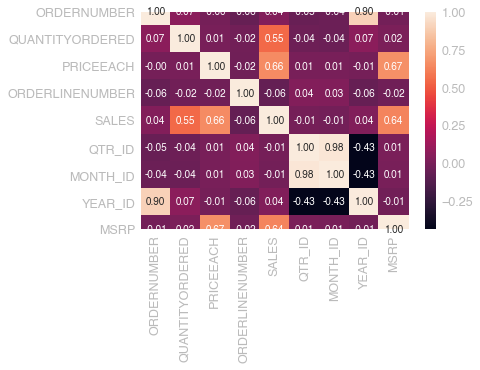

In [1]:
%run ./'Basic_Import.ipynb'
## Which imports the following libraries and functions:
# import pandas as pd, numpy as np, matplotlib.pyplot as plt
# from jupyterthemes import jtplot
# jtplot.style()
# from sklearn.model_selection import train_test_split as tts
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix
# pd.set_option('display.max_columns', None)
# %matplotlib inline

# Read in the csv file
df = pd.read_csv('../CSV_Files/Sales_Data.csv', encoding = "ISO-8859-1");
df.head()

# Create heatmap via seaborn to visualize inital correlations among dataset
import seaborn as sns
sns.heatmap(df.corr(),annot=True, fmt='0.2f');

In [69]:
# Search for existence of null values within the dataset
df.isnull().any().any()

True

In [70]:
# Find all rows that contain null values
nan_rows = df[df.isnull().any(1)];
nan_rows

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [71]:
# Drop unwanted column
df = df.drop(columns = ['ADDRESSLINE2'], axis = 1);
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,981-443655,Torikatu 38,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,61.77.6555,1 rue Alsace-Lorraine,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [79]:
# View the organized dataset at a glance
#df1 = df.sort_values(by = ["ORDERNUMBER"], ascending=False).head().plot.bar()
df1 = df.sort_values(by = ["ORDERNUMBER", "STATE"], ascending=True).head(20)
df1

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
578,10100,30,100.00,3,5151.00,1/6/2003 0:00,Shipped,1,1,2003,...,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
680,10100,50,67.80,2,3390.00,1/6/2003 0:00,Shipped,1,1,2003,...,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
1267,10100,22,86.51,4,1903.22,1/6/2003 0:00,Shipped,1,1,2003,...,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
2024,10100,49,34.47,1,1689.03,1/6/2003 0:00,Shipped,1,1,2003,...,6035558647,2304 Long Airport Avenue,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
728,10101,25,100.00,4,3782.00,1/9/2003 0:00,Shipped,1,1,2003,...,+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium
830,10101,26,100.00,1,3773.38,1/9/2003 0:00,Shipped,1,1,2003,...,+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium
1539,10101,45,31.20,3,1404.00,1/9/2003 0:00,Shipped,1,1,2003,...,+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Small
1616,10101,46,53.76,2,2472.96,1/9/2003 0:00,Shipped,1,1,2003,...,+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Small
475,10102,39,100.00,2,4808.31,1/10/2003 0:00,Shipped,1,1,2003,...,2125551500,2678 Kingston Rd.,NYC,NY,10022,USA,NaN,Frick,Michael,Medium
501,10102,41,50.14,1,2055.74,1/10/2003 0:00,Shipped,1,1,2003,...,2125551500,2678 Kingston Rd.,NYC,NY,10022,USA,NaN,Frick,Michael,Small


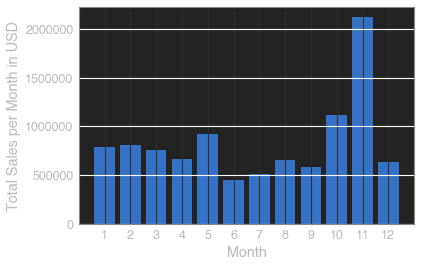

In [2]:
# Group dataset by month
df2 = df.groupby(['MONTH_ID']).sum()
#df2['SALES'].plot.bar()
months = range(1,13)

# Sum the sales by month and plot
plt.subplots(figsize=(16,10))
plt.bar(months, df.groupby(['MONTH_ID']).sum()['SALES'])
plt.xticks(months)
plt.ylabel('Total Sales per Month in USD')
plt.xlabel('Month')
plt.grid(axis = 'y', color = 'white')
plt.show()

In [123]:
# Organize data and determine sales by city, zip code, month
df_trunc = df[['POSTALCODE', 'SALES', 'CITY','MONTH_ID', 'YEAR_ID']]
df3 = df_trunc.sort_values(by = ["POSTALCODE", "CITY", "MONTH_ID"]).head(50)
df3

,POSTALCODE,SALES,CITY,MONTH_ID,YEAR_ID
475,10022,4808.31,NYC,1,2003
501,10022,2055.74,NYC,1,2003
0,10022,2871.00,NYC,2,2003
54,10022,3896.49,NYC,2,2003
80,10022,6065.55,NYC,2,2003
240,10022,3036.60,NYC,2,2003
804,10022,2055.23,NYC,2,2003
1466,10022,2845.75,NYC,2,2003
1564,10022,3155.14,NYC,2,2003
2173,10022,1858.00,NYC,2,2003


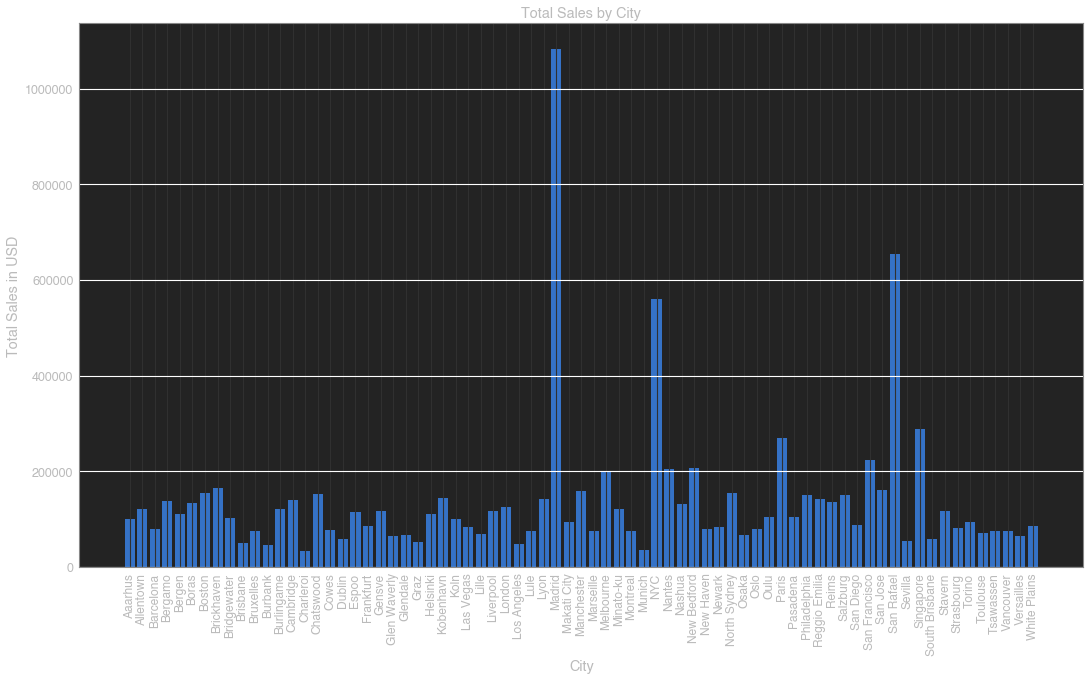

In [3]:
# Plot total sales by city
plt.subplots(figsize=(18,10))
city_x = [city for city, data in df.groupby(['CITY'])]
plt.bar(city_x, df.groupby(['CITY']).sum()['SALES'])
plt.xlabel('City')
plt.ylabel('Total Sales in USD')
plt.title('Total Sales by City')
plt.grid(axis = 'y', color = 'white')
plt.xticks(city_x, rotation = 'vertical', size = 12);

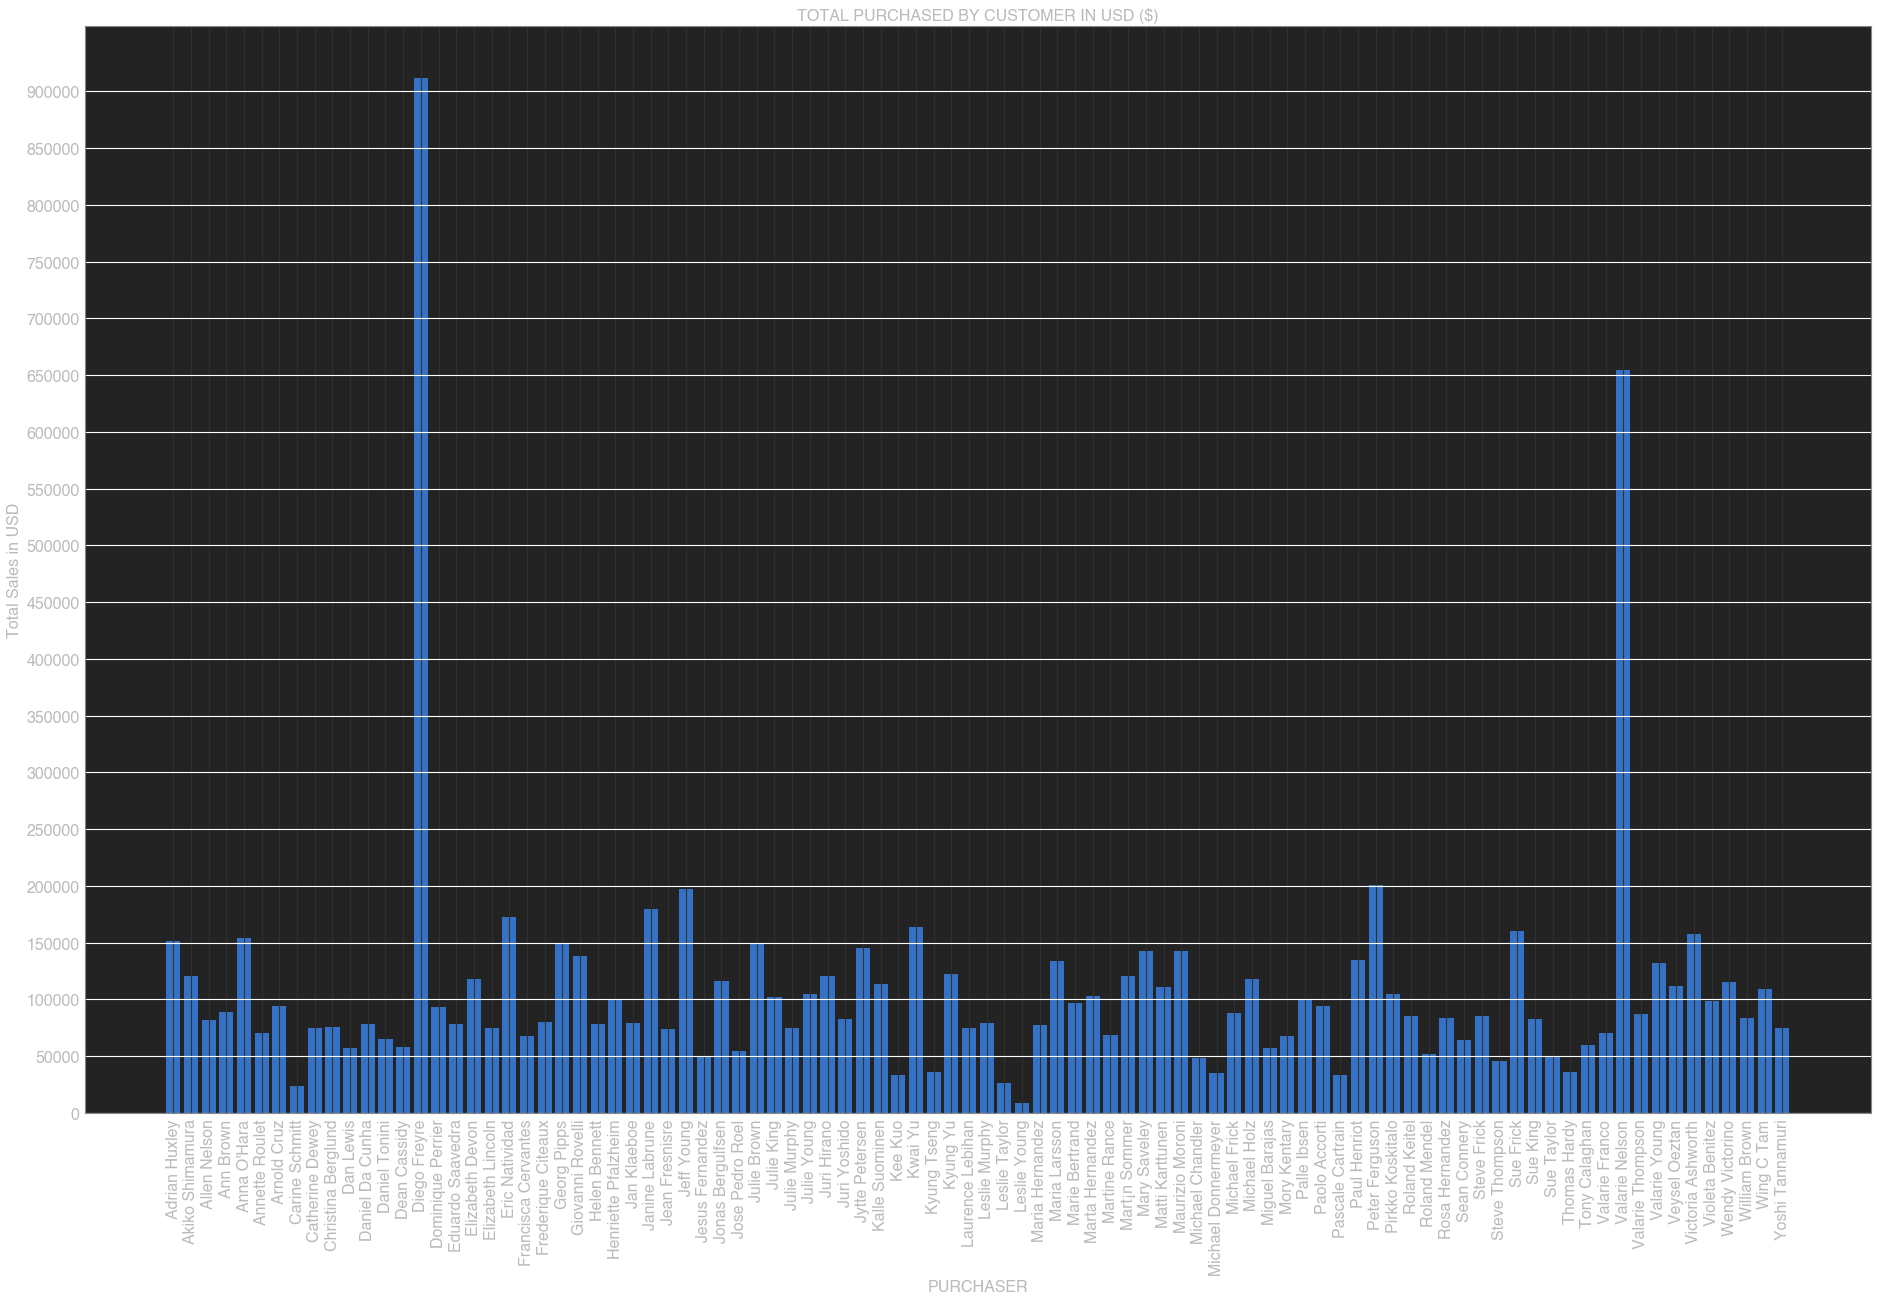

In [4]:
# Plot total sales by name of customer
df['FULLNAME'] = df[['CONTACTFIRSTNAME', 'CONTACTLASTNAME']].agg(' '.join, axis=1).astype('str')
df_person = [person for person, data in df.groupby(['FULLNAME'])]
plt.subplots(figsize = (32,20))
plt.bar(df_person, df.groupby(['FULLNAME']).sum()['SALES'])
plt.xlabel('PURCHASER', size = 16)
plt.ylabel('Total Sales in USD', size = 16)
plt.title('TOTAL PURCHASED BY CUSTOMER IN USD ($)', size = 16)
plt.grid(axis = 'y', color = 'white')
plt.yticks(np.arange(0, 950000, step=50000), size = 16);
plt.xticks(df_person, rotation = 'vertical', size = 16);

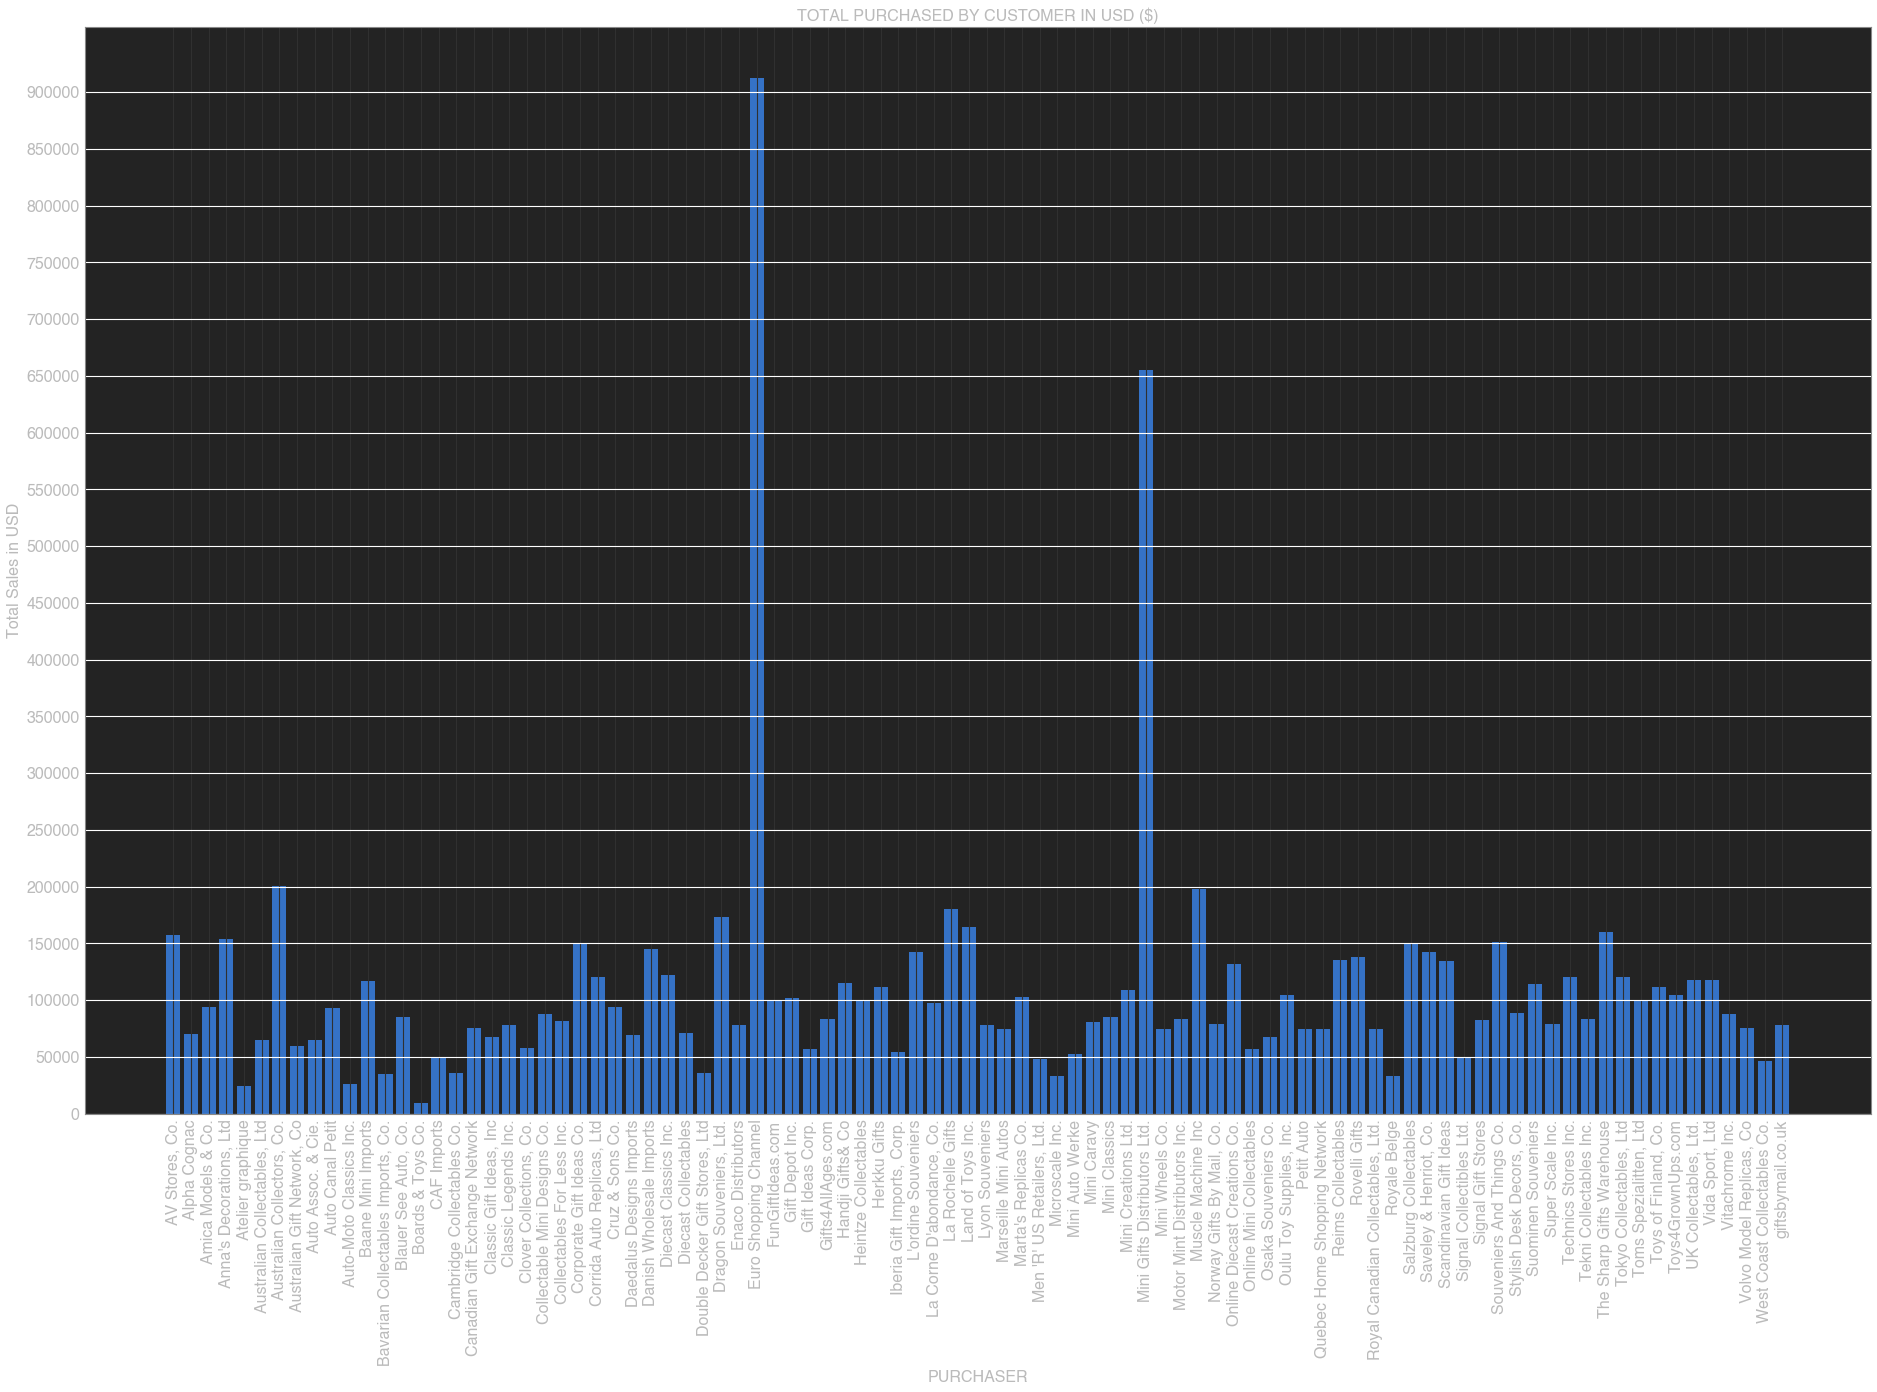

In [22]:
# Plot total sales by company
df_company = [person for person, data in df.groupby(['CUSTOMERNAME'])]
plt.subplots(figsize = (32,20))
plt.bar(df_company, df.groupby(['CUSTOMERNAME']).sum()['SALES'])
plt.xlabel('PURCHASER', size = 16)
plt.ylabel('Total Sales in USD', size = 16)
plt.title('TOTAL PURCHASED BY CUSTOMER IN USD ($)', size = 16)
plt.grid(axis = 'y', color = 'white')
plt.yticks(np.arange(0, 950000, step=50000), size = 16);
plt.xticks(df_company, rotation = 'vertical', size = 16);

# Predictive Modeling

In [189]:
df = pd.read_csv('../CSV_Files/Sales_Data.csv', encoding = "ISO-8859-1");
pd.set_option('display.max_columns', None)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


### Data Cleaning 

In [190]:
df = pd.read_csv('../CSV_Files/Sales_Data.csv', encoding = "ISO-8859-1");
df = df.loc[df['PRODUCTLINE'] == 'Motorcycles']
df = df.loc[df['STATE'] == 'CA']
df['POSTALCODE'] = df['POSTALCODE'].replace(np.nan, 0)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,0,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,NaN,San Francisco,CA,0,USA,NaN,Murphy,Julie,Small
57,10145,37,100.00,9,5192.95,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,118,S10_2016,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
58,10159,37,100.00,17,5016.83,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,118,S10_2016,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,0,USA,NaN,Brown,Julie,Medium
59,10168,27,100.00,4,3660.93,10/28/2003 0:00,Shipped,4,10,2003,Motorcycles,118,S10_2016,Technics Stores Inc.,6505556809,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
62,10201,24,100.00,5,3025.92,12/1/2003 0:00,Shipped,4,12,2003,Motorcycles,118,S10_2016,Mini Wheels Co.,6505555787,5557 North Pendale Street,NaN,San Francisco,CA,0,USA,NaN,Murphy,Julie,Medium
83,10145,33,100.00,8,5176.38,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,193,S10_4698,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
84,10159,22,100.00,16,4132.70,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,193,S10_4698,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,0,USA,NaN,Brown,Julie,Medium


### Backwards Elimination via Ordinary Least Squares

In [153]:
X = df.iloc[:, [0,1,2,7,8,9,19]].astype('float64').values
X = df.iloc[:, [0,1,2,7,9,19]].astype('float64').values
X = df.iloc[:, [0,1,2,9,19]].astype('float64').values
X = df.iloc[:, [1,2,9,19]].astype('float64').values
X = df.iloc[:, [1,2,9]].astype('float64').values
y = df.iloc[:, 4:5].values

In [154]:
import statsmodels.regression.linear_model as sm
# OLS = Ordinary Least Squares
linreg_OLS = sm.OLS(endog = y, exog = X).fit()
linreg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              399.3
Date:                Sat, 28 Mar 2020   Prob (F-statistic):                    2.17e-35
Time:                        17:05:47   Log-Likelihood:                         -434.86
No. Observations:                  54   AIC:                                      875.7
Df Residuals:                      51   BIC:                                      881.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            90.6626     11.906      7.615      0.000      66.760     114.565
x2            57.1124      5.057     11.295      0.000      46.961      67.264
x3            -2.2031      0.302     -7.297      0.000      -2.809      -1.597
==============================================================================
Omnibus:                       17.770   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.716
Skew:                           1.239   Prob(JB):                     1.17e-05
Kurtosis:                       4.990   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Choose One Value Determined by OLS

In [191]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 4:5].values
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

### Random Forest with Original Data

/Users/morgan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


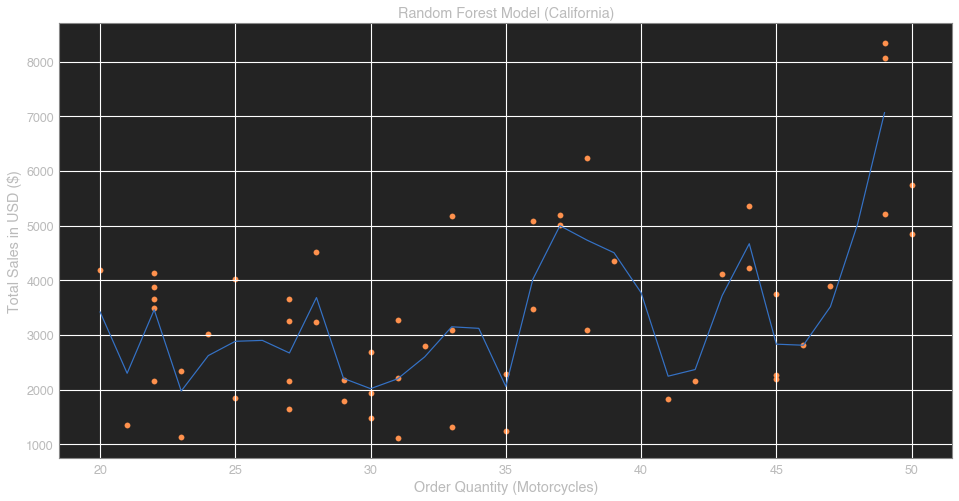

[3422.77257019]


In [197]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,random_state=0)
forest.fit(X,y)
X_grid = np.arange(min(X), max(X), 1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.subplots(figsize = (16,8))
plt.scatter(X, y, color = 'y')
plt.plot(X_grid, forest.predict(X_grid), color = 'b')
plt.title('Random Forest Model (California)')
plt.xlabel('Order Quantity (Motorcycles)')
plt.ylabel('Total Sales in USD ($)')
plt.grid(axis = 'both', color = 'white')
plt.show()

# Predict total sales based on random quantity
y_pred = forest.predict([[20]])
print(y_pred)

### Random Forest with Training Set

/Users/morgan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


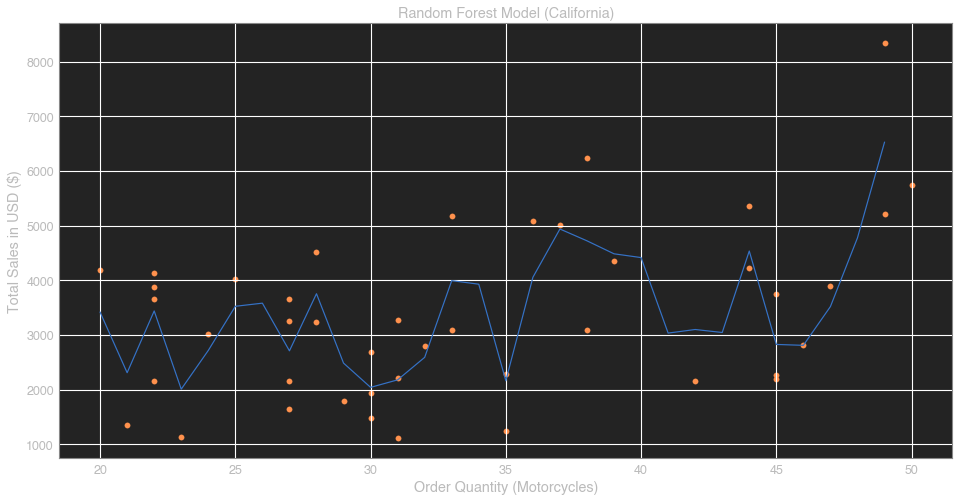

[3418.96056395]


In [193]:
forest = RandomForestRegressor(n_estimators=1000,random_state=0)
forest.fit(X_train,y_train)
X_grid = np.arange(min(X_train), max(X_train), 1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.subplots(figsize = (16,8))
plt.scatter(X_train, y_train, color = 'y')
plt.plot(X_grid, forest.predict(X_grid), color = 'b')
plt.title('Random Forest Model (California)')
plt.xlabel('Order Quantity (Motorcycles)')
plt.ylabel('Total Sales in USD ($)')
plt.grid(axis = 'both', color = 'white')
plt.show()
# Predict total sales based on random quantity
y_pred = forest.predict([[20]])
print(y_pred)

### Random Forest with Test Set

/Users/morgan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


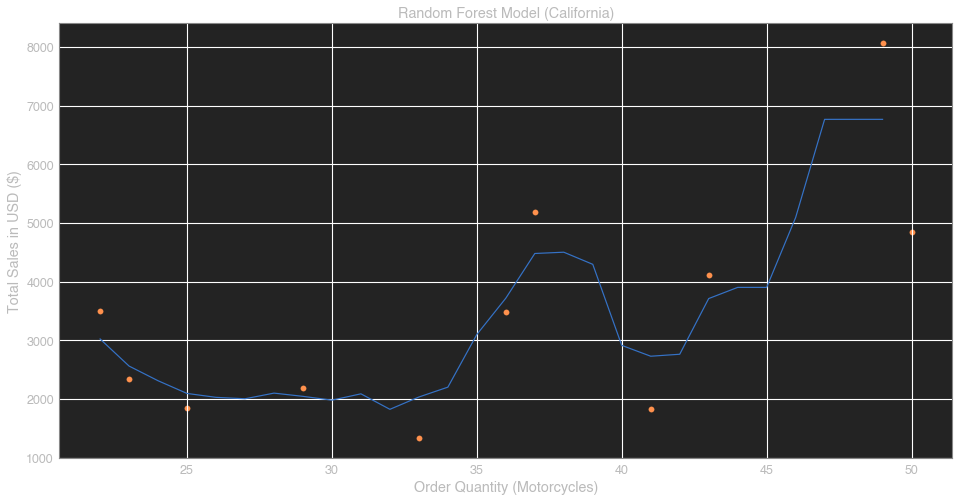

[3023.05519]


In [196]:
forest = RandomForestRegressor(n_estimators=1000,random_state=0)
forest.fit(X_test,y_test)
X_grid = np.arange(min(X_test), max(X_test), 1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.subplots(figsize = (16,8))
plt.scatter(X_test, y_test, color = 'y')
plt.plot(X_grid, forest.predict(X_grid), color = 'b')
plt.title('Random Forest Model (California)')
plt.xlabel('Order Quantity (Motorcycles)')
plt.ylabel('Total Sales in USD ($)')
plt.grid(axis = 'both', color = 'white')
plt.show()
# Predict total sales based on random quantity
y_pred = forest.predict([[20]])
print(y_pred)